# GridLAB-D Quick Pole File Converter Guide
The pole_file_converter.py file is currently in the directory *gridlabd-template/US/CA/SLAC/anticipation* of the *add-resilience-template* branch.
## Program Dependencies 
1. This program is dependent on the file *Pole_Output_Sample.xls* found in the same directory as the *pole_file_converter.py*. Later versions may support custom inputs, but as of now, this program only uses that file. 
2. This program is dependent on pandas and regular expressions, so make sure they are installed. It is recommended to run this file within the Docker container of the latest GridLAB-D image as it is the environment this file was written in. 

## Program Usage
This python file reads the input *Pole_Output_Sample.xls* and outputs *Sample_Output.csv* where the input is a sample file from SpidaCalc and the output is a GridLAB-D recognizable csv file. This output is usually supplied to *anticipation.glm* as an input to convert csv pole data to glm objects. The statement used is 

In [1]:
#input "Sample_Output.csv" -t object -f table

## General Input Assumptions 
1. Inputs to be of similar format as *Pole_Output_Sample.xls* with three sheets in the order __Design - Pole__, __Design - Structure__, and __Analysis__. Currently, the __Analysis__ sheet is not used.
2. The names of the indexes in __Design - Pole__ to be *Owner,	Species,	Length,	Class,	AGL,	GLC,	Foundation	Ground Water Level,	Lean Angle,	Lean Direction,	Allowable Stress Adjustment	Effective Stress Adjustment*, and 	*GPS Point*
3. The names of the indexes in __Design - Strucutre__ to be *ID#,	Size,	Height,	Direction,	Offset/Lead,	Owner,	Type,*	and *Related*.
4. The first row of each sheet to be the header. 
5. There is only one pole in __Design - Pole__ and every row in __Design - Structure__ represents pole_mount objects on that pole.


## Mapping of Input Columns to Output Columns 
The output columns represent the values of properties corresponding to the GridLAB-D object. Empty output cells represent dropped input columns while empty input cells indicate a manually added property. The *class* column is used to differentiate between rows representing different objects. 
1.  __Design - Pole__

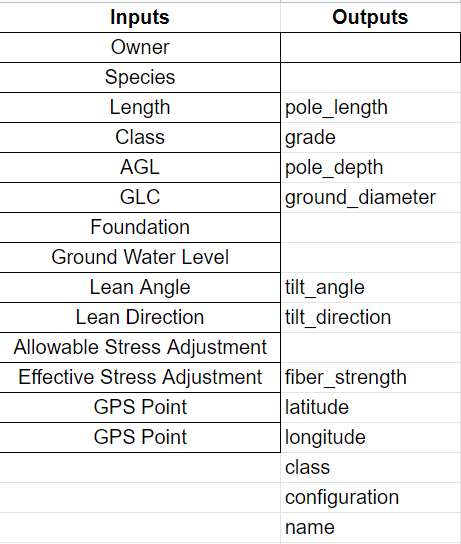

The output column *configuration* is for a pole object to specify its configuration. The output column *name* is for both the pole object and pole configuration object to have a name. The main purpose is so the pole object can specify its pole configuration object using the pole configuration object's name. The output of this sheet can be found in __Design - Pole.csv__. 

2. __Design - Structure__ 
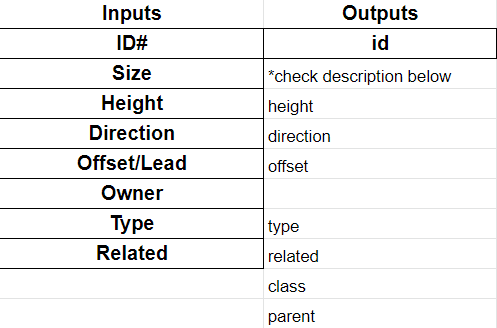

The size column is currently not used to test the syntax of the other columns. In the near future, it can map to the area and the weight of a wire pole_mount object. The *parent* column is the name of the pole the pole_mount objects are attached to. The output of this sheet can be found in __Design - Structure.csv__. 


3. __Combined CSV Output__
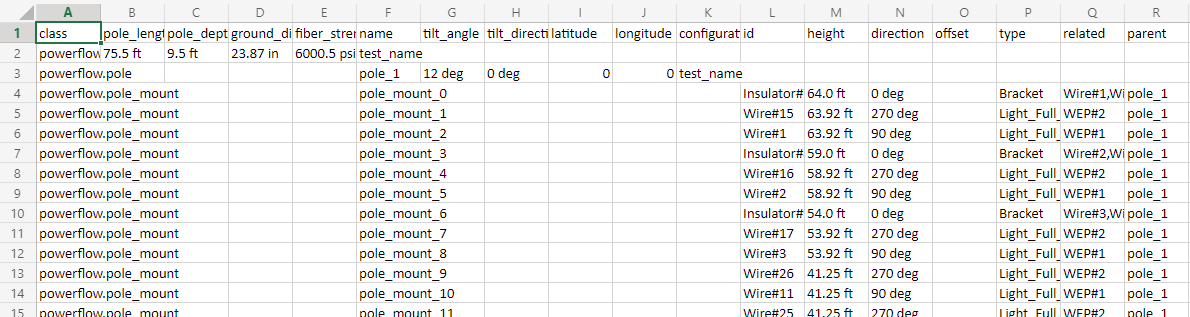

The final CSV output is attached above. There are blocks of empty cells because each class has different properties that might not be shared with other classes. 

## Specific Input Assumptions and Functionalities
Each value in a given row is assumed to be a specific type of value.

All cells representing measurements are expected to have a value along with units except for the column *GPS Point*. All cells given invalid values (i.e. missing units, missing values, etc.) will raise a ValueError, print a message of the value, row, and column of the input where the error occured, and produce an empty string as the output. 

1. Column Values - *Lengths*

Multiple values can be present in one cell. Examples are 5'6" and 7 ft 11 inch. In these cases, the values will be converted to whichever unit was listed first. There must be the same number of values as units. Otherwise, a ValueError will be raised. To recognize more strings as lengths, add to the dictionary *length_units* in the definition of the function *parse_length*. Example columns (input) include *Length, AGL,* and *GLC*.  

2. Column Values - *Angles, Pressures*

For angles and pressures, multiple values are not supported. To recognize more strings as angles, add to the dictionary *angle_units* in the definition of the function *parse_angle*. Example columns (input) include *Lean Angle* and *Lean Direction*. 

3. Notes
* The column (output) *pole_depth*, is calculated by subtracting the *AGL* (above ground level) from the *Length* of the pole. It is expected that those two columns have the same units. A ValueError will be raised if different units are present.
* The columns *latitude* and *longitude* (output) are converted by simply splitting ' , ' from the value of *GPS Point* (input), so if the format is not exactly as the value supplied, errors might occur. 
* For more information on specific lines of code, consult the comments in the program file. 

## TODOS
1. The values of the *Size* column (input) in __Design - Structure__ is dropped for testing purposes. Next steps are mapping the size of wires (wires are indicated by the ID# column) to the area and weight/ft and use that information to populate new output columns *area* and *weight* where *area* is the cross-section area of the wire and *weight* is the weight/ft of the wire multiplied by the length of the wire. 
2. The last two rows in __Design - Structure__ represent the adjacent poles of the current pole. The Lead/Offset (input) value in this case should be mapped to the pole_spacing property of the pole_mount object. 
